# EDA - Government Benefits & Taxes

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/code/')
from time_series_plots import plot_time_series
sns.set_style("darkgrid")

In [45]:
df_FRB = pd.read_csv("/Users/AaranDaniel/Desktop/DSI/projects/Group_Project_5_GA/data/frb_monthly_debt_bal_clean.csv", index_col='date', parse_dates=True)

In [46]:
df = pd.read_csv('../data/master_with_gdp.csv', index_col='date', parse_dates=True)
df.drop(columns=['year', 'month'], inplace=True)
df.head()


,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,gasoline_yoy,imports_yoy,...,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions,credit_yoy,gdp
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,283960000.0,4.2,NaN,3.732227,3.252886,17.777778,4.538341,2.889825,13.143736,2.760736,...,1.289199e+12,7.281720e+11,2.068559e+12,.,7.0325,NaN,NaN,NaN,12.391364,10470.231000
2001-02-01,284166000.0,4.2,NaN,3.533569,3.457307,13.110540,4.600390,3.006615,8.400292,0.200602,...,1.303434e+12,7.330290e+11,2.087987e+12,15.63,7.0500,NaN,NaN,NaN,12.757135,10513.154000
2001-03-01,284380000.0,4.3,NaN,2.920561,3.496868,5.973813,4.540163,3.123123,-6.099935,-1.601602,...,1.313079e+12,7.357760e+11,2.100751e+12,.,6.9520,NaN,NaN,NaN,12.611905,10556.077000
2001-04-01,284602000.0,4.4,NaN,3.269119,3.595623,10.273405,4.643963,3.181273,3.851262,-0.710660,...,1.315105e+12,7.335270e+11,2.100756e+12,.,7.0775,NaN,NaN,NaN,12.895804,10599.000000
2001-05-01,284834000.0,4.3,NaN,3.615160,3.742204,15.785124,4.668210,3.108189,15.420561,-0.809717,...,1.310869e+12,7.328300e+11,2.096159e+12,15.06,7.1450,NaN,NaN,NaN,12.498904,10598.673333


In [47]:
# make subset of particular variables to focus on
df_subset = df[['cpi_yoy', 'personal_saving_as_a_percentage_of_disposable_personal_income',
                'disp_inc_per_capita_current_dollars', 'tax_total_all_taxes', 'total_gov_social_benefits', 'social_security', 
                'medicare', 'medicaid', 'unemployment_insurance', "veterans'_benefits",
                 'cc_bals_90d_due_percentage', 'cc_bals_30d_due_percentage',
                 'disp_inc_per_capita_chained_2017', 'cc_balance_total_billions',
                 'total_disposable_personal_income', 'credit_yoy', 'gdp']]
df_subset = df_subset.merge(df_FRB[['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)']],
              left_index=True, right_index=True, how='left')
df_subset['total_consumer_credit'] = df_subset['total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)'] * 1000000
df_subset.drop(columns = 'total_consumer_credit_owned_and_securitized_not_seasonally_adjusted_level_(currency_1000000)', inplace=True)
df_subset.head()

,cpi_yoy,personal_saving_as_a_percentage_of_disposable_personal_income,disp_inc_per_capita_current_dollars,tax_total_all_taxes,total_gov_social_benefits,social_security,medicare,medicaid,unemployment_insurance,veterans'_benefits,cc_bals_90d_due_percentage,cc_bals_30d_due_percentage,disp_inc_per_capita_chained_2017,cc_balance_total_billions,total_disposable_personal_income,credit_yoy,gdp,total_consumer_credit
date,,,,,,,,,,,,,,,,,,
2001-01-01,3.732227,4.5,26946.0,2.068559e+12,1.100584e+12,4.192080e+11,2.314920e+11,2.108160e+11,2.732400e+10,2.608800e+10,NaN,NaN,35962.0,NaN,7.651692e+12,12.391364,10470.231000,1.744174e+12
2001-02-01,3.533569,4.6,27000.0,2.087987e+12,1.106776e+12,4.205400e+11,2.338800e+11,2.146440e+11,2.535600e+10,2.607600e+10,NaN,NaN,35977.0,NaN,7.672371e+12,12.757135,10513.154000,1.746978e+12
2001-03-01,2.920561,4.9,27064.0,2.100751e+12,1.115956e+12,4.226880e+11,2.361720e+11,2.195280e+11,2.367600e+10,2.598000e+10,NaN,NaN,36059.0,NaN,7.696337e+12,12.611905,10556.077000,1.749724e+12
2001-04-01,3.269119,4.8,27034.0,2.100756e+12,1.133332e+12,4.229760e+11,2.383440e+11,2.289960e+11,2.726400e+10,2.643600e+10,NaN,NaN,35956.0,NaN,7.693797e+12,12.895804,10599.000000,1.765924e+12
2001-05-01,3.615160,4.3,27034.0,2.096159e+12,1.140364e+12,4.228560e+11,2.403960e+11,2.315760e+11,2.910000e+10,2.636400e+10,NaN,NaN,35862.0,NaN,7.700196e+12,12.498904,10598.673333,1.773883e+12


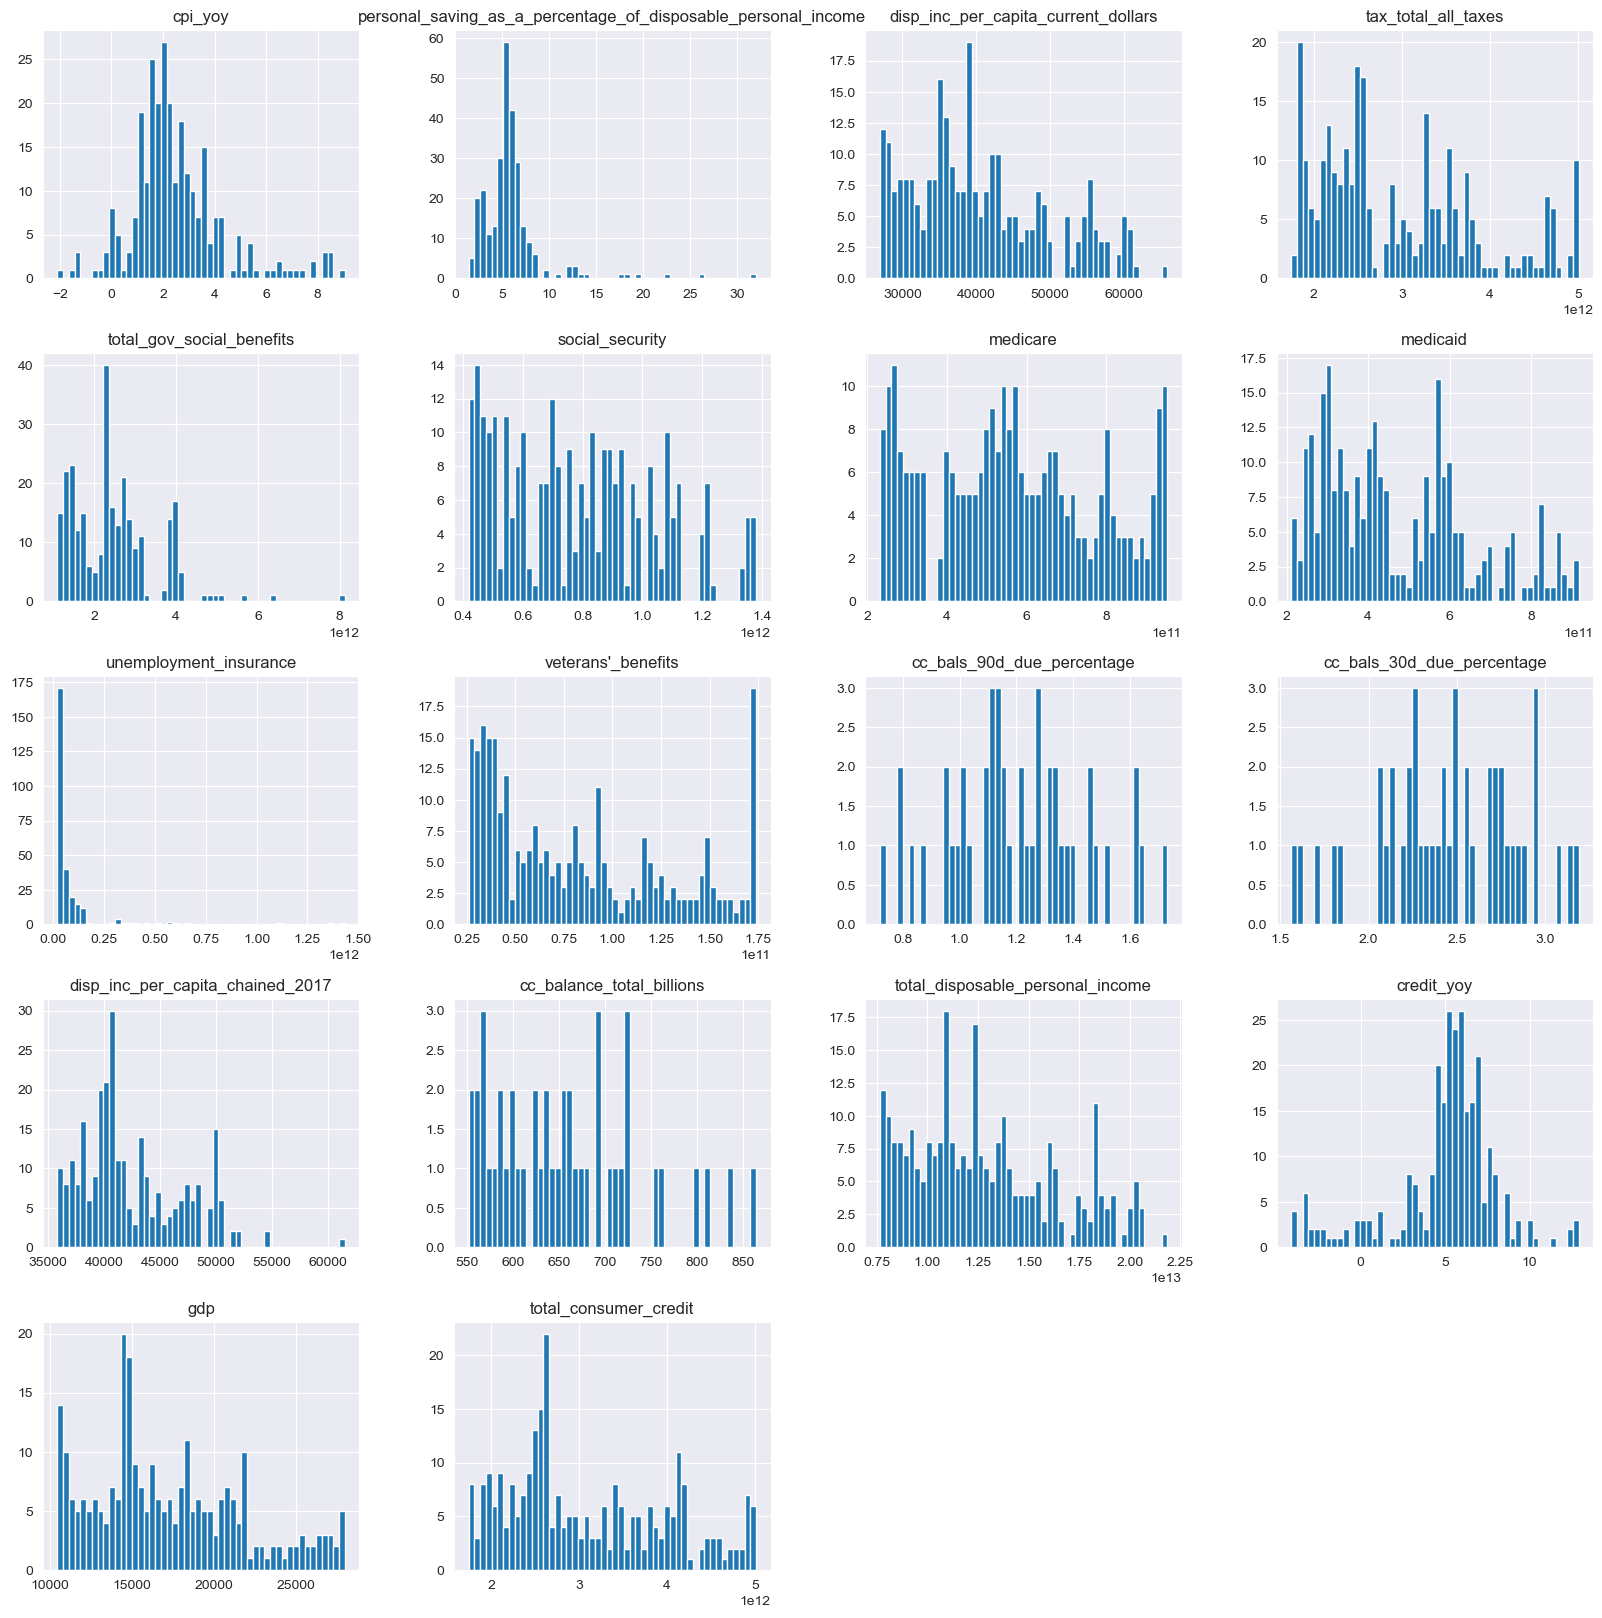

In [48]:
df_subset.hist(bins = 50, figsize = (20, 20));

- CPI slightly left skewed, centred around 2% which is the FED target inflation rate. Minimum of -2% and max 9%. 
- Personal savings as % of disposible income very right skewed, a long tail of periods with abnormally high personal savings. 

### Taxes and govt benefits plotted with Disposible Income, Savings and Credit

In [49]:
df_subset.corr(numeric_only=True)['total_disposable_personal_income'].sort_values(ascending=False)

total_disposable_personal_income                                 1.000000
disp_inc_per_capita_current_dollars                              0.999475
social_security                                                  0.989551
gdp                                                              0.988375
total_consumer_credit                                            0.987882
medicare                                                         0.987855
veterans'_benefits                                               0.987333
medicaid                                                         0.985716
disp_inc_per_capita_chained_2017                                 0.975810
tax_total_all_taxes                                              0.968755
total_gov_social_benefits                                        0.944089
cc_balance_total_billions                                        0.769403
personal_saving_as_a_percentage_of_disposable_personal_income    0.404414
cpi_yoy                               

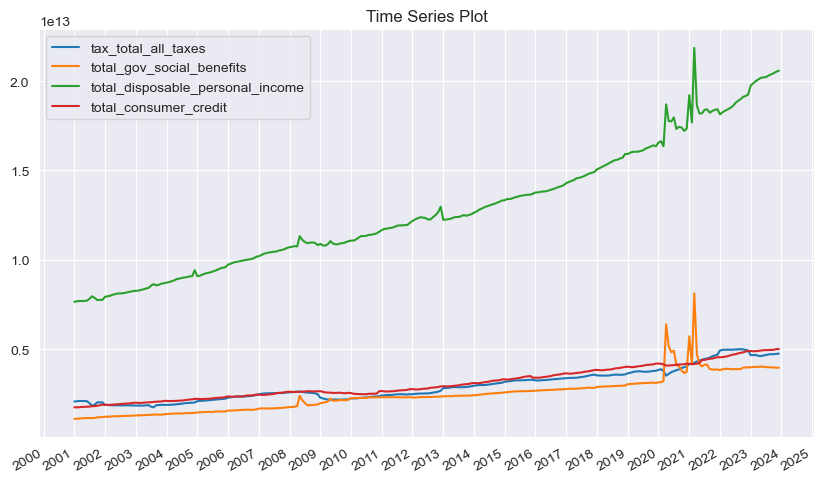

In [50]:
plot_time_series(df_subset, columns = ['tax_total_all_taxes', 
                                       'total_gov_social_benefits', 
                                       'total_disposable_personal_income',
                                       'total_consumer_credit'])

In [51]:
# analysis of gov benefits and types of benefit 

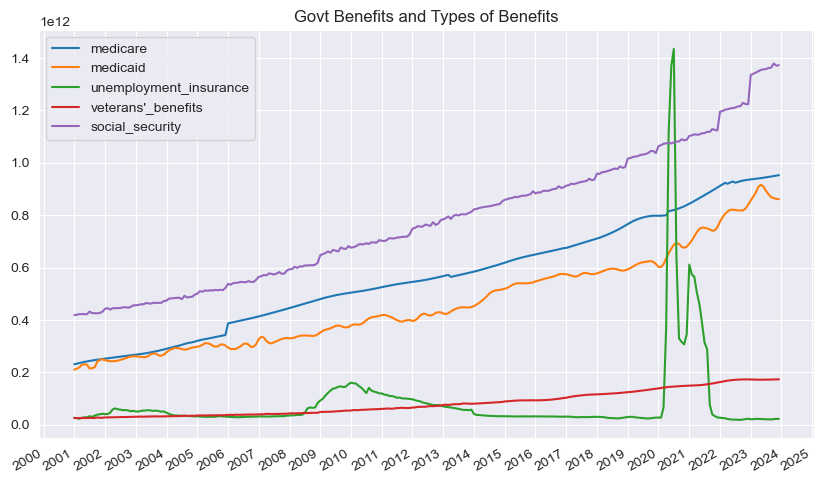

In [52]:
plot_time_series(df_subset, columns = ['medicare', 'medicaid', 
                                       'unemployment_insurance', 
                                       "veterans'_benefits", 
                                       'social_security'], title = 'Govt Benefits and Types of Benefits')

### Taxation 

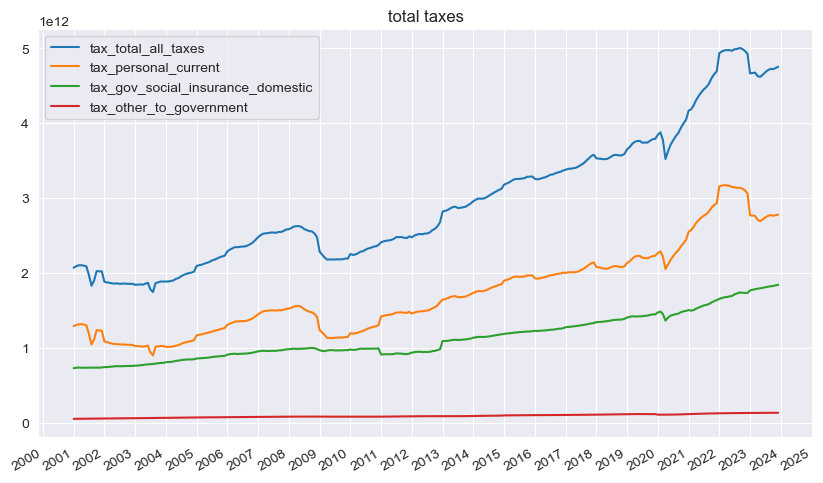

In [53]:
plot_time_series(df, columns = ['tax_total_all_taxes', 
                                       'tax_personal_current',
                                        'tax_gov_social_insurance_domestic',
                                        'tax_other_to_government'],title = 'total taxes')

In [54]:
df.corr(numeric_only=True)['tax_total_all_taxes'].sort_values(ascending=False)

tax_total_all_taxes                                                1.000000
tax_personal_current                                               0.995811
wages_salaries_private_employees                                   0.990048
wages_and_salaries_all                                             0.987927
total_employee_compensation                                        0.986343
tax_gov_social_insurance_domestic                                  0.986020
personal_dividend_income                                           0.985122
gdp                                                                0.982565
employer_contributions_for_government_social_insurance             0.982208
total_all_personal_outlays                                         0.979673
total_personal_income                                              0.978492
veterans'_benefits                                                 0.977859
medicaid                                                           0.975873
total_dispos